<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Clustering Techniques

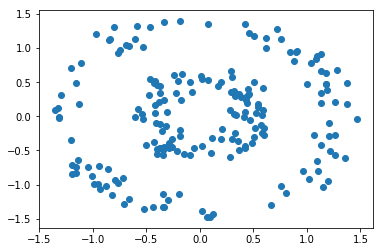

In [43]:
import numpy as np
from sklearn import cluster

import matplotlib.pyplot as plt
%matplotlib inline

###########
# Generating data
###########

n = 100
X_data = np.zeros((2*n,2))

t = np.random.uniform(low=0,high=6.28,size=100)
X_data[0:n,0] = 1.3*np.cos(t)+np.random.uniform(low=-0.2,high=0.2,size=n)
X_data[0:n,1] = 1.3*np.sin(t)+np.random.uniform(low=-0.2,high=0.2,size=n)

X_data[n:,0] = 0.5*np.cos(t)+np.random.uniform(low=-0.2,high=0.2,size=n)
X_data[n:,1] = 0.5*np.sin(t)+np.random.uniform(low=-0.2,high=0.2,size=n)

plt.scatter(X_data[:,0],X_data[:,1])

(-1.5309338781261421,
 1.6446850144514384,
 -1.633620363192046,
 1.5520056889808334)

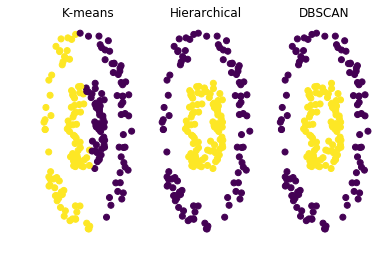

In [49]:
###########
# k-means Clustering
###########

km = cluster.KMeans(n_clusters=2, random_state=0)
km.fit(X_data)
cl_km = km.labels_


plt.figure(1)
plt.subplot(1,3,1)
plt.title('K-means')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_km)
plt.axis('off')

###########
# Hierarchical Clustering
###########

hc = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
#hc = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
hc.fit(X_data)
cl_hi = hc.labels_

plt.subplot(1,3,2)
plt.title('Hierarchical')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_hi)
plt.axis('off')

###########
# DBSCAN
###########

dbc = cluster.DBSCAN(eps=0.4, min_samples=2)
#dbc = cluster.DBSCAN(eps=0.1, min_samples=3)
dbc.fit(X_data)
cl_db = dbc.labels_

plt.subplot(1,3,3)
plt.title('DBSCAN')
plt.scatter(X_data[:,0],X_data[:,1],c=cl_db)
plt.axis('off')

## Homework Clustering Digit Images

(1797, 8, 8)


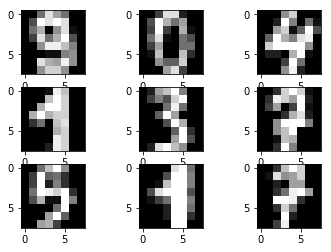

In [8]:
import numpy as np
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()
print(digits.images.shape)

#showing some images randomly chosen
cimag = np.random.randint(low=0,high=digits.images.shape[0],size=9)
for i in range(cimag.size):
    plt.subplot(3,3,i+1)
    plt.imshow(digits.images[cimag[i]], cmap='gray')

Perform the following tasks:
1. Convert digit images in points in a high-dimensional space (hit: 64-dimensional spaxce)
2. clusterize the points using hierarchical clustering, k-means, and DBSCAN
3. Use the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)  to compare the quality of the cluster resulting from each technique (see [Wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering)) for the mathematical definition of silhouete score)
4. Use PCA to visualize the generated clusters
5. Which are the images classified as noise by DBSCAN?

In [10]:
# Embeding images in a 64-dimensional space

point_images = np.zeros((digits.images.shape[0],64))
for i in range(digits.images.shape[0]):
    point_images[i,:] = digits.images[i].ravel()
print(point_images.shape)

(1797, 64)


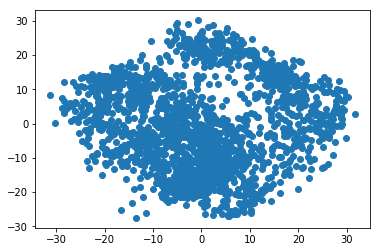

In [13]:
# computing PCA

from sklearn.decomposition import PCA

digits_pca = PCA(n_components=2)
point_digits_pca = digits_pca.fit_transform(point_images)

plt.scatter(point_digits_pca[:,0],point_digits_pca[:,1])

#plt.scatter(point_digits_pca[:,0],point_digits_pca[:,1],c=digits.target)